In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [3]:
pip install keras

SyntaxError: invalid syntax (<ipython-input-3-d2a01015921f>, line 1)

In [4]:
pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=af90e6d8a126fa8c847b5f8f146a5f24fe22a3ee06a01d672e7b6fb4c838a093
  Stored in directory: c:\users\sdahiwadkar\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=fb3f92fd53d0505a6ba73d85fe4ddc981d9f98fbefb5383b9f52fea1bec306a8
  Stored in directory: c:\users\sdahiwadkar\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built termcolor wraptNote: you may need to restart the kernel to use updated packages.

  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2


# Import Libraries

In [28]:
import sys
from matplotlib import pyplot as plt
import numpy as np
import pathlib

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers.normalization import BatchNormalization

from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm

In [16]:
#%cd /content/drive/MyDrive/CatsDogsClassification/dataset/
path_to_train = pathlib.Path("./dc/dataset/training_set")
path_to_test = pathlib.Path("./dc/dataset/test_set")
dogs_train_path = pathlib.Path("./dc/dataset/training_set/dogs")
cats_train_path = pathlib.Path("./dc/dataset/training_set/cats")
dogs_test_path = pathlib.Path("./dc/dataset/test_set/dogs")
cats_test_path = pathlib.Path("./dc/dataset/test_set/cats")

In [17]:
img_rows = 150
img_cols = 150
epochs = 25
batch_size = 64

# Data Visualization And Augumentation

In [18]:
image_count_train = len(list(path_to_train.glob('*/*.jpg')))
print("Total Training Images = ", image_count_train)
image_count_test = len(list(path_to_test.glob('*/*.jpg')))
print("Total Training Images = ", image_count_test)

Total Training Images =  8000
Total Training Images =  2000


In [19]:
sample_datagen = ImageDataGenerator(rescale=1./255)
sample_data = sample_datagen.flow_from_directory(
        path_to_train,  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        shuffle=True,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [20]:
print('Following are the found classes along with their float representation')
print(sample_data.class_indices)

Following are the found classes along with their float representation
{'cats': 0, 'dogs': 1}


## Sample Data Set

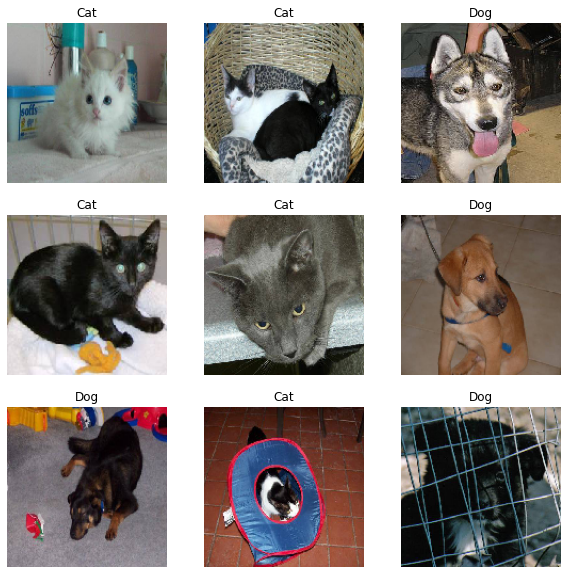

In [8]:
x, y= sample_data.next()
plt.figure(figsize=(10, 10))
for i in range(0,9):
    image = x[i]
    label = 'Cat' if y[i] == 0.0 else 'Dog'
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.title(label)
    plt.axis("off")

## Image Augumentation Example
### Width Shift, Factor 0.4
#### Cat

<ipython-input-163-98d75cb1f469>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-163-98d75cb1f469>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)


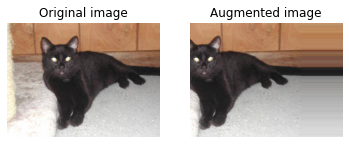

In [163]:
import random
image_gen = ImageDataGenerator(rescale=1./255, width_shift_range=0.4)
catimg = load_img('./dc/dataset/training_set/cats/cat.'+ str(random.randint(1000, 1009)) +'.jpg') # this is a PIL image
x = img_to_array(catimg) # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

y = image_gen.flow(x, batch_size=1)
for _ in range(3):
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(catimg)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    img = y.next()
    plt.imshow(img[0])
    plt.axis("off")

#### Dog

<ipython-input-165-8c44c3c4cae6>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-165-8c44c3c4cae6>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)


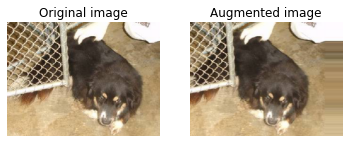

In [165]:
dogimg = load_img('./dc/dataset/training_set/dogs/dog.'+ str(random.randint(1000, 1009)) +'.jpg') # this is a PIL image
p = img_to_array(dogimg)
p = p.reshape((1,) + p.shape)

q = image_gen.flow(p, batch_size=1)

for _ in range(3):
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(dogimg)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    img = q.next()
    plt.imshow(img[0])
    plt.axis("off")

## Image Augumentation Example
### Horizontal Flip
#### Cat

<ipython-input-166-fbe8c0699fda>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-166-fbe8c0699fda>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)


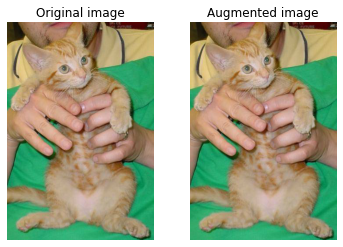

In [166]:
cat_image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
catimg = load_img('./dc/dataset/training_set/cats/cat.'+ str(random.randint(1000, 1009)) +'.jpg') # this is a PIL image
x = img_to_array(catimg) # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

y = cat_image_gen.flow(x, batch_size=1)
for _ in range(3):
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(catimg)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    img = y.next()
    plt.imshow(img[0])
    plt.axis("off")

#### Dog

<ipython-input-167-6ff91a216bba>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-167-6ff91a216bba>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)


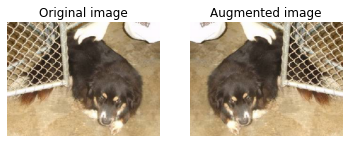

In [167]:
d_image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
dogimg = load_img('./dc/dataset/training_set/dogs/dog.'+ str(random.randint(1000, 1009)) +'.jpg') # this is a PIL image
x = img_to_array(dogimg) # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

w = d_image_gen.flow(x, batch_size=1)
for _ in range(3):
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(dogimg)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    img = w.next()
    plt.imshow(img[0])
    plt.axis("off")

## Generate Training and Testing Data

In [168]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        width_shift_range=0.4,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        path_to_train,  
        target_size=(img_cols, img_rows),  
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

validation_generator = test_datagen.flow_from_directory(
        path_to_test, 
        target_size=(img_cols, img_rows),  
        batch_size=batch_size,
        class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [170]:
x, y= train_generator.next()

### Plot sample training samples after data augumentation

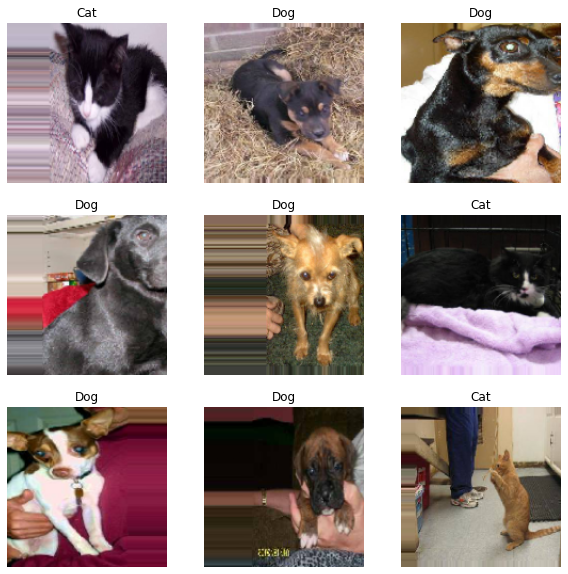

In [171]:
plt.figure(figsize=(10, 10))
for i in range(0,9):
    image = x[i]
    label = 'Cat' if y[i] == 0.0 else 'Dog'
    ax = plt.subplot(3, 3, i+1)
    #print (label)
    plt.imshow(image)
    plt.title(label)
    plt.axis("off")
    #plt.show()

In [172]:
def plot_graph(history):
  plt.plot(history.history['accuracy'], label='Train Acc')
  plt.plot(history.history['val_accuracy'], label='Val Acc')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Plot of Training & Validation Accuracy')
  plt.legend()
  plt.show()

def plot_model_loss_graph(history):
    # summarize history for loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

## Build Model
### Without Regularizer

In [ ]:
# Model without regularizer
from keras.regularizers import l2
model = Sequential()


model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Train the model

In [35]:
history = model.fit(
        train_generator,
        steps_per_epoch=8000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=2000 // batch_size)
model.save_weights('first_try.h5')  # always save your weights after training or during training

Epoch 1/50
125/125 [==============================] - 304s 2s/step - loss: 1.1920 - accuracy: 0.5792 - val_loss: 1.3138 - val_accuracy: 0.5232
Epoch 2/50
125/125 [==============================] - 283s 2s/step - loss: 0.6164 - accuracy: 0.6632 - val_loss: 1.1496 - val_accuracy: 0.5035
Epoch 3/50
125/125 [==============================] - 250s 2s/step - loss: 0.5867 - accuracy: 0.6984 - val_loss: 0.8627 - val_accuracy: 0.5403
Epoch 4/50
125/125 [==============================] - 261s 2s/step - loss: 0.5563 - accuracy: 0.7094 - val_loss: 0.5701 - val_accuracy: 0.6860
Epoch 5/50
125/125 [==============================] - 261s 2s/step - loss: 0.5207 - accuracy: 0.7419 - val_loss: 0.5668 - val_accuracy: 0.6976
Epoch 6/50
125/125 [==============================] - 276s 2s/step - loss: 0.5229 - accuracy: 0.7415 - val_loss: 0.6795 - val_accuracy: 0.6406
Epoch 7/50
125/125 [==============================] - 294s 2s/step - loss: 0.4787 - accuracy: 0.7745 - val_loss: 0.4868 - val_accuracy: 0.7681

### Find Mean Training Accuracy And Validation Accuracy

In [83]:
print("Average training accuracy >",np.mean(history.history['accuracy']))
print("Average validation accuracy >",np.mean(history.history['val_accuracy']))

Average training accuracy > 0.8784200048446655
Average validation accuracy > 0.8362600839138031


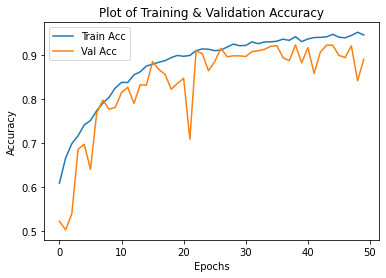

In [75]:
plot_graph(history)

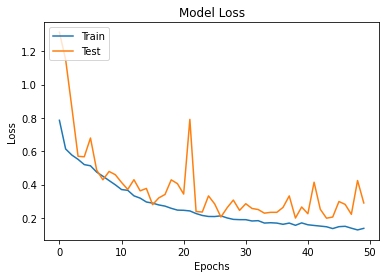

In [97]:
plot_model_loss_graph(history)

### Find final testing accuracy

In [155]:
# evaluate model
_, acc = model.evaluate(validation_generator, steps=len(validation_generator), verbose=1)
print('Final Testing Accuracy With The Test Data > %.3f' % (acc * 100.0))

32/32 [==============================] - 12s 366ms/step - loss: 0.2911 - accuracy: 0.8895
Final Testing Accuracy With The Test Data > 88.950


### Calculate Confusion matrix and Classification report

In [55]:
#Confution Matrix and Classification Report
Y_pred = model.predict(validation_generator, 2000 // batch_size+1)

In [84]:
#y_pred = np.argmax(Y_pred, axis=1)
y_pred=np.where(Y_pred>0.5, 1, 0)
print('Confusion Matrix')
matrix = cm(validation_generator.classes, y_pred)
print(matrix)
print('Classification Report')
target_names = ['Cats', 'Dogs']
print(cr(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[446 554]
 [431 569]]
Classification Report
              precision    recall  f1-score   support

        Cats       0.51      0.45      0.48      1000
        Dogs       0.51      0.57      0.54      1000

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



## Model With Regularizer

In [87]:
# Model with regularizer
from keras.regularizers import l2
model_with_reg = Sequential()


model_with_reg.add(Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(BatchNormalization())

model_with_reg.add(Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_with_reg.add(BatchNormalization())

model_with_reg.add(Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_with_reg.add(BatchNormalization())

model_with_reg.add(Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_with_reg.add(BatchNormalization())

model_with_reg.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model_with_reg.add(Dense(units = 128, activation = 'relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_with_reg.add(Dropout(0.2))
model_with_reg.add(Dense(units = 1, activation = 'sigmoid', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

model_with_reg.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [88]:
history_reg = model_with_reg.fit(
        train_generator,
        steps_per_epoch=800 // batch_size,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=200 // batch_size)

Epoch 1/5
12/12 [==============================] - 352s 27s/step - loss: 116.5601 - accuracy: 0.5530 - val_loss: 58.4933 - val_accuracy: 0.5312
Epoch 2/5
12/12 [==============================] - 240s 19s/step - loss: 76.4108 - accuracy: 0.5272 - val_loss: 85.9617 - val_accuracy: 0.4896
Epoch 3/5
12/12 [==============================] - 239s 20s/step - loss: 79.2761 - accuracy: 0.5244 - val_loss: 92.1237 - val_accuracy: 0.4635
Epoch 4/5
12/12 [==============================] - 209s 17s/step - loss: 71.2612 - accuracy: 0.5135 - val_loss: 84.3004 - val_accuracy: 0.5260
Epoch 5/5
12/12 [==============================] - 242s 21s/step - loss: 57.5890 - accuracy: 0.5156 - val_loss: 87.9783 - val_accuracy: 0.4531


In [90]:
print("Average training accuracy >",np.mean(history.history['accuracy']))
print("Average validation accuracy >",np.mean(history.history['val_accuracy']))

Average training accuracy > 0.8784200048446655
Average validation accuracy > 0.8362600839138031


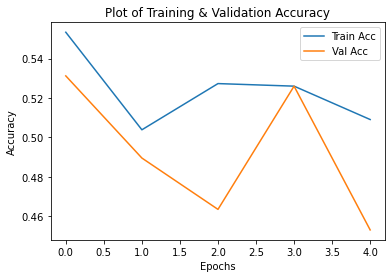

In [92]:
plot_graph(history_reg)

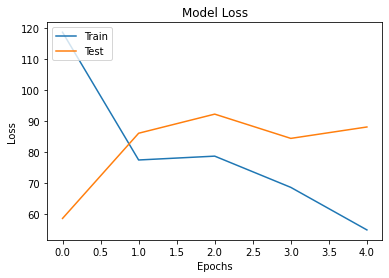

In [96]:
plot_model_loss_graph(history_reg)

In [98]:
# evaluate model
_, acc = model_with_reg.evaluate(validation_generator, steps=len(validation_generator), verbose=1)
print('Final Testing Accuracy With The Test Data > %.3f' % (acc * 100.0))

32/32 [==============================] - 111s 3s/step - loss: 84.3902 - accuracy: 0.5000
Final Testing Accuracy With The Test Data > 50.000


In [100]:
#Confution Matrix and Classification Report
Y_pred = model_with_reg.predict(validation_generator, 2000 // batch_size+1)
#y_pred = np.argmax(Y_pred, axis=1)
y_pred=np.where(Y_pred>0.5, 1, 0)
print('Confusion Matrix')
matrix = cm(validation_generator.classes, y_pred)
print(matrix)
print('Classification Report')
target_names = ['Cats', 'Dogs']
print(cr(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[1000    0]
 [1000    0]]
Classification Report
              precision    recall  f1-score   support

        Cats       0.50      1.00      0.67      1000
        Dogs       0.00      0.00      0.00      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000



## Model With Regularizer And aiitional dropouts

In [104]:
# Model with regularizer
from keras.regularizers import l2
model_with_reg_do = Sequential()


model_with_reg_do.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(BatchNormalization())

model_with_reg_do.add(Conv2D(32, 3, padding='same', activation='relu'))
model_with_reg_do.add(BatchNormalization())

model_with_reg_do.add(Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01)))
model_with_reg_do.add(BatchNormalization())

model_with_reg_do.add(Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_with_reg_do.add(Dropout(0.2))
model_with_reg_do.add(BatchNormalization())

model_with_reg_do.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model_with_reg_do.add(Dense(units = 128, activation = 'relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_with_reg_do.add(Dropout(0.2))
model_with_reg_do.add(Dense(units = 1, activation = 'sigmoid', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

model_with_reg_do.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [105]:
history_reg_do = model_with_reg_do.fit(
        train_generator,
        steps_per_epoch=800 // batch_size,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=200 // batch_size)

Epoch 1/5
12/12 [==============================] - 333s 25s/step - loss: 118.1004 - accuracy: 0.5611 - val_loss: 75.3519 - val_accuracy: 0.5208
Epoch 2/5
12/12 [==============================] - 261s 22s/step - loss: 72.8369 - accuracy: 0.5357 - val_loss: 107.9473 - val_accuracy: 0.5625
Epoch 3/5
12/12 [==============================] - 286s 24s/step - loss: 81.8273 - accuracy: 0.5557 - val_loss: 109.4784 - val_accuracy: 0.5208
Epoch 4/5
12/12 [==============================] - 262s 22s/step - loss: 76.2685 - accuracy: 0.4990 - val_loss: 89.8641 - val_accuracy: 0.4948
Epoch 5/5
12/12 [==============================] - 238s 20s/step - loss: 64.3721 - accuracy: 0.4875 - val_loss: 70.9042 - val_accuracy: 0.4896


In [106]:
print("Average training accuracy >",np.mean(history_reg_do.history['accuracy']))
print("Average validation accuracy >",np.mean(history_reg_do.history['val_accuracy']))

Average training accuracy > 0.5276041626930237
Average validation accuracy > 0.5177083253860474


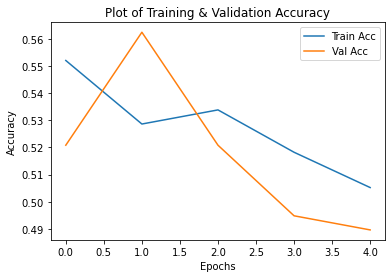

In [107]:
plot_graph(history_reg_do)

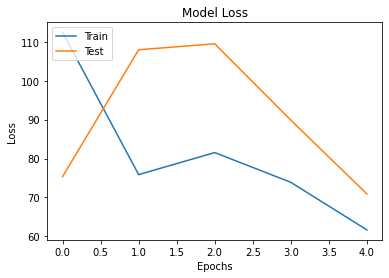

In [108]:
plot_model_loss_graph(history_reg_do)

In [109]:
# evaluate model
_, acc = model_with_reg_do.evaluate(validation_generator, steps=len(validation_generator), verbose=1)
print('Final Testing Accuracy With The Test Data > %.3f' % (acc * 100.0))

32/32 [==============================] - 115s 4s/step - loss: 69.8762 - accuracy: 0.5095
Final Testing Accuracy With The Test Data > 50.950


In [110]:
#Confution Matrix and Classification Report
Y_pred = model_with_reg_do.predict(validation_generator, 2000 // batch_size+1)
#y_pred = np.argmax(Y_pred, axis=1)
y_pred=np.where(Y_pred>0.5, 1, 0)
print('Confusion Matrix')
matrix = cm(validation_generator.classes, y_pred)
print(matrix)
print('Classification Report')
target_names = ['Cats', 'Dogs']
print(cr(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[750 250]
 [741 259]]
Classification Report
              precision    recall  f1-score   support

        Cats       0.50      0.75      0.60      1000
        Dogs       0.51      0.26      0.34      1000

    accuracy                           0.50      2000
   macro avg       0.51      0.50      0.47      2000
weighted avg       0.51      0.50      0.47      2000



## Model With More Depth

In [113]:
#Model 2 With more depth
from keras.regularizers import l2
model2 = Sequential()


model2.add(Conv2D(32, 3, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D())

model2.add(Conv2D(32, 3, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D())

model2.add(Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D())

model2.add(Conv2D(128, 3, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D())

model2.add(Conv2D(256, 3, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D())

model2.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model2.add(Dense(units = 128, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units = 1, activation = 'sigmoid'))

model2.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [114]:
history2 = model2.fit(
        train_generator,
        steps_per_epoch=8000 // batch_size,
        epochs=15,
        validation_data=validation_generator,
        validation_steps=2000 // batch_size)
model2.save_weights('first_try.h5')  # always save your weights after training or during training

Epoch 1/15
125/125 [==============================] - 241s 2s/step - loss: 1.3364 - accuracy: 0.5912 - val_loss: 0.9768 - val_accuracy: 0.5010
Epoch 2/15
125/125 [==============================] - 238s 2s/step - loss: 0.8441 - accuracy: 0.6596 - val_loss: 0.8424 - val_accuracy: 0.5050
Epoch 3/15
125/125 [==============================] - 236s 2s/step - loss: 0.6937 - accuracy: 0.7000 - val_loss: 0.9432 - val_accuracy: 0.5141
Epoch 4/15
125/125 [==============================] - 245s 2s/step - loss: 0.6143 - accuracy: 0.7200 - val_loss: 0.7083 - val_accuracy: 0.6714
Epoch 5/15
125/125 [==============================] - 243s 2s/step - loss: 0.5590 - accuracy: 0.7463 - val_loss: 0.5585 - val_accuracy: 0.7314
Epoch 6/15
125/125 [==============================] - 236s 2s/step - loss: 0.5154 - accuracy: 0.7721 - val_loss: 0.5213 - val_accuracy: 0.7636
Epoch 7/15
125/125 [==============================] - 236s 2s/step - loss: 0.4983 - accuracy: 0.7811 - val_loss: 0.4911 - val_accuracy: 0.7777

In [115]:
print("Average training accuracy >",np.mean(history2.history['accuracy']))
print("Average validation accuracy >",np.mean(history2.history['val_accuracy']))

Average training accuracy > 0.7937000036239624
Average validation accuracy > 0.7320900559425354


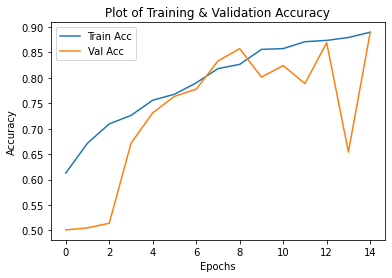

In [117]:
plot_graph(history2)

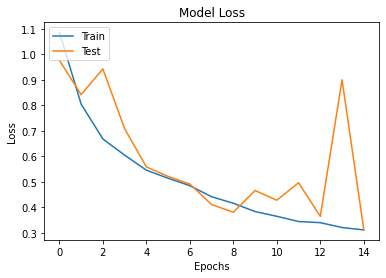

In [118]:
plot_model_loss_graph(history2)

In [119]:
# evaluate model
_, acc = model2.evaluate(validation_generator, steps=len(validation_generator), verbose=1)
print('Final Testing Accuracy With The Test Data > %.3f' % (acc * 100.0))

32/32 [==============================] - 14s 437ms/step - loss: 0.3108 - accuracy: 0.8895
Final Testing Accuracy With The Test Data > 88.950


In [120]:
#Confution Matrix and Classification Report
Y_pred = model2.predict(validation_generator, 2000 // batch_size+1)
#y_pred = np.argmax(Y_pred, axis=1)
y_pred=np.where(Y_pred>0.5, 1, 0)
print('Confusion Matrix')
matrix = cm(validation_generator.classes, y_pred)
print(matrix)
print('Classification Report')
target_names = ['Cats', 'Dogs']
print(cr(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[478 522]
 [465 535]]
Classification Report
              precision    recall  f1-score   support

        Cats       0.51      0.48      0.49      1000
        Dogs       0.51      0.54      0.52      1000

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



In [173]:
## Model With Different Optimizer

In [127]:
from keras.regularizers import l2
model3 = Sequential()


model3.add(Conv2D(32, 3, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D())

model3.add(Conv2D(32, 3, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D())

model3.add(Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D())

model3.add(Conv2D(128, 3, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D())

model3.add(Conv2D(256, 3, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D())

model3.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model3.add(Dense(units = 128, activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units = 1, activation = 'sigmoid'))

#model2.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model3.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [128]:
history3 = model3.fit(
        train_generator,
        steps_per_epoch=8000 // batch_size,
        epochs=15,
        validation_data=validation_generator,
        validation_steps=2000 // batch_size)
model3.save_weights('first_try.h5')  # always save your weights after training or during training

Epoch 1/15
125/125 [==============================] - 244s 2s/step - loss: 0.4374 - accuracy: 0.4961 - val_loss: 0.4590 - val_accuracy: 0.4970
Epoch 2/15
125/125 [==============================] - 239s 2s/step - loss: 0.4653 - accuracy: 0.5055 - val_loss: 0.4840 - val_accuracy: 0.5000
Epoch 3/15
125/125 [==============================] - 247s 2s/step - loss: 0.4898 - accuracy: 0.5149 - val_loss: 0.5081 - val_accuracy: 0.5015
Epoch 4/15
125/125 [==============================] - 266s 2s/step - loss: 0.5144 - accuracy: 0.5060 - val_loss: 0.5313 - val_accuracy: 0.4980
Epoch 5/15
125/125 [==============================] - 338s 3s/step - loss: 0.5376 - accuracy: 0.5132 - val_loss: 0.5553 - val_accuracy: 0.5076
Epoch 6/15
125/125 [==============================] - 342s 3s/step - loss: 0.5612 - accuracy: 0.5089 - val_loss: 0.5785 - val_accuracy: 0.5292
Epoch 7/15
125/125 [==============================] - 361s 3s/step - loss: 0.5845 - accuracy: 0.5029 - val_loss: 0.6016 - val_accuracy: 0.5005

In [129]:
print("Average training accuracy >",np.mean(history3.history['accuracy']))
print("Average validation accuracy >",np.mean(history3.history['val_accuracy']))

Average training accuracy > 0.5048083305358887
Average validation accuracy > 0.5026209731896718


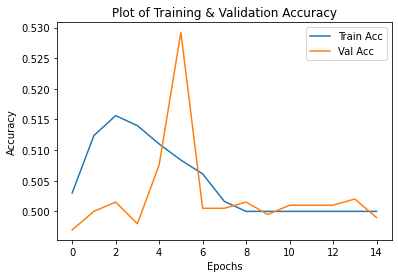

In [130]:
plot_graph(history3)

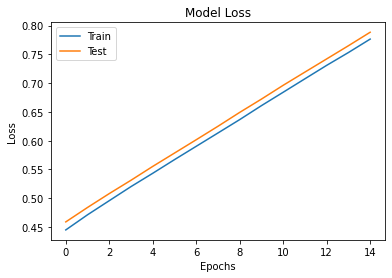

In [131]:
plot_model_loss_graph(history3)

In [132]:
# evaluate model
_, acc = model3.evaluate(validation_generator, steps=len(validation_generator), verbose=1)
print('Final Testing Accuracy With The Test Data > %.3f' % (acc * 100.0))

32/32 [==============================] - 18s 553ms/step - loss: 0.7883 - accuracy: 0.5000
Final Testing Accuracy With The Test Data > 50.000


In [136]:
#Confution Matrix and Classification Report
Y_pred = model3.predict(validation_generator, 2000 // batch_size+1)
#y_pred = np.argmax(Y_pred, axis=1)
y_pred=np.where(Y_pred>0.5, 1, 0)
print('Confusion Matrix')
matrix = cm(validation_generator.classes, y_pred)
print(matrix)
print('Classification Report')
target_names = ['Cats', 'Dogs']
print(cr(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[1000    0]
 [1000    0]]
Classification Report
              precision    recall  f1-score   support

        Cats       0.50      1.00      0.67      1000
        Dogs       0.00      0.00      0.00      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000

